## Alhajuela Lake Bed Sedimentation Prediction

In [5]:
import sys
import seaborn as sns
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
print(np.__version__)
print(pd.__version__)
print(sys.version)
print(sklearn.__version__)
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPRegressor
from sklearn import preprocessing


1.21.2
1.3.2
3.7.10 | packaged by conda-forge | (default, Feb 19 2021, 15:37:01) [MSC v.1916 64 bit (AMD64)]
0.24.2


In [6]:
print(np.__version__)
print(pd.__version__)
print(sys.version)
print(sklearn.__version__)

1.21.2
1.3.2
3.7.10 | packaged by conda-forge | (default, Feb 19 2021, 15:37:01) [MSC v.1916 64 bit (AMD64)]
0.24.2


In [52]:
df = pd.read_csv('data/Fin9.csv', delim_whitespace=False, header=0)

In [53]:
df.keys()

Index(['x', 'y', 'horigin', 'year', 'height', 'slope', 'aspect', 'dh', 'T',
       'depth', 'dRM1', 'dRM2', 'dRM3', 'dRM4', 'dRM5', 'dRM6', 'dRM7',
       'dRMtot', 'Xfactor'],
      dtype='object')

In [54]:
df.head()

x            y  horigin  year  height  slope  aspect   dh   T  \
0 655,559.71 1,015,911.65   663.63  2008  674.60   0.35  180.00 1.00  11   
1 655,584.71 1,015,911.65   663.63  2008  674.57   3.94  278.92 0.99  11   
2 655,609.71 1,015,911.65   667.03  2008  684.05   7.63  329.48 1.55  11   
3 655,634.71 1,015,911.65   667.03  2008  684.48  12.34    0.00 1.59  11   
4 655,659.71 1,015,911.65   667.03  2008  675.99  15.54   48.72 0.81  11   

   depth      dRM1      dRM2      dRM3     dRM4      dRM5     dRM6     dRM7  \
0 357.63 16,204.93 16,088.46 12,588.49 7,720.53 10,685.86 9,201.77 6,142.22   
1 357.63 16,201.95 16,088.57 12,588.64 7,730.47 10,682.52 9,197.89 6,128.26   
2 361.03 16,199.02 16,088.72 12,588.83 7,740.48 10,679.24 9,194.07 6,114.36   
3 361.03 16,196.12 16,088.91 12,589.07 7,750.56 10,676.01 9,190.33 6,100.53   
4 361.03 16,193.26 16,089.14 12,589.36 7,760.70 10,672.84 9,186.65 6,086.78   

     dRMtot  Xfactor  
0 78,632.26       10  
1 78,618.29       10  
2 78,604.72       10  
3 78,591.53       10  
4 78,578.73       10

In [79]:
col_study = ['x', 'y', 'horigin', 'year', 'slope', 'aspect', 'T', 'dRM1',
       'dRM2', 'dRM3', 'dRM4', 'dRM5', 'dRM6', 'dRM7', 'dRMtot', 'depth','Xfactor']
param_study = 'dh'

In [80]:
#sns.pairplot(df);
#plt.show()

# Correlation Analysis and Feature Selection

In [81]:
pd.options.display.float_format = '{:,.3f}'.format

In [82]:
df.corr()

x      y  horigin   year  height  slope  aspect     dh      T  \
x        1.000  0.254    0.394  0.000   0.351 -0.373   0.124 -0.049 -0.000   
y        0.254  1.000    0.435  0.000   0.365 -0.171   0.014 -0.101 -0.000   
horigin  0.394  0.435    1.000  0.000   0.938  0.087  -0.028  0.019 -0.000   
year     0.000  0.000    0.000  1.000   0.154  0.058   0.004  0.389 -0.606   
height   0.351  0.365    0.938  0.154   1.000  0.107  -0.004  0.345 -0.100   
slope   -0.373 -0.171    0.087  0.058   0.107  1.000  -0.084  0.081 -0.058   
aspect   0.124  0.014   -0.028  0.004  -0.004 -0.084   1.000  0.066  0.001   
dh      -0.049 -0.101    0.019  0.389   0.345  0.081   0.066  1.000 -0.392   
T       -0.000 -0.000   -0.000 -0.606  -0.100 -0.058   0.001 -0.392  1.000   
depth    0.394  0.435    1.000  0.000   0.938  0.087  -0.028  0.019  0.000   
dRM1    -0.294 -0.993   -0.445 -0.000  -0.371  0.195  -0.025  0.107 -0.000   
dRM2    -0.212 -0.986   -0.426 -0.000  -0.351  0.172  -0.010  0.112 -0.000   
dRM3    -0.120 -0.882   -0.365 -0.000  -0.293  0.135   0.001  0.115 -0.000   
dRM4     0.573  0.405    0.380 -0.000   0.359 -0.205   0.070  0.006 -0.000   
dRM5    -0.179 -0.681   -0.286 -0.000  -0.219  0.139  -0.017  0.119 -0.000   
dRM6    -0.150 -0.331   -0.122 -0.000  -0.072  0.102  -0.023  0.105  0.000   
dRM7    -0.251  0.694    0.245  0.000   0.219  0.066  -0.055 -0.018  0.000   
dRMtot  -0.193 -0.760   -0.304 -0.000  -0.232  0.162  -0.017  0.126  0.000   
Xfactor  0.000 -0.000    0.000 -0.115  -0.009  0.022  -0.005  0.151 -0.721   

         depth   dRM1   dRM2   dRM3   dRM4   dRM5   dRM6   dRM7  dRMtot  \
x        0.394 -0.294 -0.212 -0.120  0.573 -0.179 -0.150 -0.251  -0.193   
y        0.435 -0.993 -0.986 -0.882  0.405 -0.681 -0.331  0.694  -0.760   
horigin  1.000 -0.445 -0.426 -0.365  0.380 -0.286 -0.122  0.245  -0.304   
year     0.000 -0.000 -0.000 -0.000 -0.000 -0.000 -0.000  0.000  -0.000   
height   0.938 -0.371 -0.351 -0.293  0.359 -0.219 -0.072  0.219  -0.232   
slope    0.087  0.195  0.172  0.135 -0.205  0.139  0.102  0.066   0.162   
aspect  -0.028 -0.025 -0.010  0.001  0.070 -0.017 -0.023 -0.055  -0.017   
dh       0.019  0.107  0.112  0.115  0.006  0.119  0.105 -0.018   0.126   
T        0.000 -0.000 -0.000 -0.000 -0.000 -0.000  0.000  0.000   0.000   
depth    1.000 -0.445 -0.426 -0.365  0.380 -0.286 -0.122  0.245  -0.304   
dRM1    -0.445  1.000  0.994  0.906 -0.386  0.725  0.387 -0.641   0.801   
dRM2    -0.426  0.994  1.000  0.936 -0.317  0.755  0.420 -0.649   0.828   
dRM3    -0.365  0.906  0.936  1.000 -0.034  0.917  0.664 -0.458   0.948   
dRM4     0.380 -0.386 -0.317 -0.034  1.000  0.224  0.516  0.481   0.160   
dRM5    -0.286  0.725  0.755  0.917  0.224  1.000  0.902 -0.108   0.986   
dRM6    -0.122  0.387  0.420  0.664  0.516  0.902  1.000  0.288   0.851   
dRM7     0.245 -0.641 -0.649 -0.458  0.481 -0.108  0.288  1.000  -0.185   
dRMtot  -0.304  0.801  0.828  0.948  0.160  0.986  0.851 -0.185   1.000   
Xfactor -0.000  0.000  0.000 -0.000  0.000  0.000  0.000  0.000   0.000   

         Xfactor  
x          0.000  
y         -0.000  
horigin    0.000  
year      -0.115  
height    -0.009  
slope      0.022  
aspect    -0.005  
dh         0.151  
T         -0.721  
depth     -0.000  
dRM1       0.000  
dRM2       0.000  
dRM3      -0.000  
dRM4       0.000  
dRM5       0.000  
dRM6       0.000  
dRM7       0.000  
dRMtot     0.000  
Xfactor    1.000

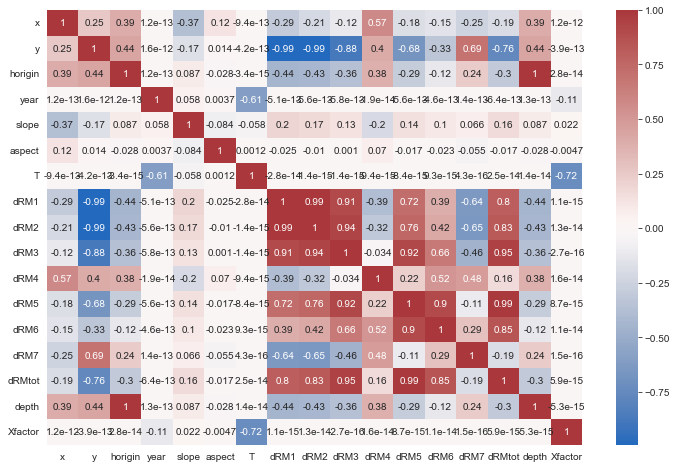

In [83]:
plt.figure(figsize=(12,8))
sns.heatmap(df[col_study].corr(), annot=True, cmap="vlag")
plt.show()

---

# Evaluating Regression Model Performance

In [84]:
from sklearn.model_selection import train_test_split

In [85]:
X, y = df[col_study], df[param_study]

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [87]:
print(X_train.shape)

(132153, 17)


In [88]:
print(y_train.shape)

(132153,)


# Correlation Matrix

#### Useful daigrnostic tool to identify colinearity between predictors

In [89]:
pd.options.display.float_format = '{:,.2f}'.format
corr_matrix = df.corr()
corr_matrix

x     y  horigin  year  height  slope  aspect    dh     T  depth  \
x        1.00  0.25     0.39  0.00    0.35  -0.37    0.12 -0.05 -0.00   0.39   
y        0.25  1.00     0.44  0.00    0.36  -0.17    0.01 -0.10 -0.00   0.44   
horigin  0.39  0.44     1.00  0.00    0.94   0.09   -0.03  0.02 -0.00   1.00   
year     0.00  0.00     0.00  1.00    0.15   0.06    0.00  0.39 -0.61   0.00   
height   0.35  0.36     0.94  0.15    1.00   0.11   -0.00  0.34 -0.10   0.94   
slope   -0.37 -0.17     0.09  0.06    0.11   1.00   -0.08  0.08 -0.06   0.09   
aspect   0.12  0.01    -0.03  0.00   -0.00  -0.08    1.00  0.07  0.00  -0.03   
dh      -0.05 -0.10     0.02  0.39    0.34   0.08    0.07  1.00 -0.39   0.02   
T       -0.00 -0.00    -0.00 -0.61   -0.10  -0.06    0.00 -0.39  1.00   0.00   
depth    0.39  0.44     1.00  0.00    0.94   0.09   -0.03  0.02  0.00   1.00   
dRM1    -0.29 -0.99    -0.44 -0.00   -0.37   0.20   -0.02  0.11 -0.00  -0.44   
dRM2    -0.21 -0.99    -0.43 -0.00   -0.35   0.17   -0.01  0.11 -0.00  -0.43   
dRM3    -0.12 -0.88    -0.36 -0.00   -0.29   0.13    0.00  0.11 -0.00  -0.36   
dRM4     0.57  0.40     0.38 -0.00    0.36  -0.20    0.07  0.01 -0.00   0.38   
dRM5    -0.18 -0.68    -0.29 -0.00   -0.22   0.14   -0.02  0.12 -0.00  -0.29   
dRM6    -0.15 -0.33    -0.12 -0.00   -0.07   0.10   -0.02  0.10  0.00  -0.12   
dRM7    -0.25  0.69     0.24  0.00    0.22   0.07   -0.05 -0.02  0.00   0.24   
dRMtot  -0.19 -0.76    -0.30 -0.00   -0.23   0.16   -0.02  0.13  0.00  -0.30   
Xfactor  0.00 -0.00     0.00 -0.11   -0.01   0.02   -0.00  0.15 -0.72  -0.00   

         dRM1  dRM2  dRM3  dRM4  dRM5  dRM6  dRM7  dRMtot  Xfactor  
x       -0.29 -0.21 -0.12  0.57 -0.18 -0.15 -0.25   -0.19     0.00  
y       -0.99 -0.99 -0.88  0.40 -0.68 -0.33  0.69   -0.76    -0.00  
horigin -0.44 -0.43 -0.36  0.38 -0.29 -0.12  0.24   -0.30     0.00  
year    -0.00 -0.00 -0.00 -0.00 -0.00 -0.00  0.00   -0.00    -0.11  
height  -0.37 -0.35 -0.29  0.36 -0.22 -0.07  0.22   -0.23    -0.01  
slope    0.20  0.17  0.13 -0.20  0.14  0.10  0.07    0.16     0.02  
aspect  -0.02 -0.01  0.00  0.07 -0.02 -0.02 -0.05   -0.02    -0.00  
dh       0.11  0.11  0.11  0.01  0.12  0.10 -0.02    0.13     0.15  
T       -0.00 -0.00 -0.00 -0.00 -0.00  0.00  0.00    0.00    -0.72  
depth   -0.44 -0.43 -0.36  0.38 -0.29 -0.12  0.24   -0.30    -0.00  
dRM1     1.00  0.99  0.91 -0.39  0.72  0.39 -0.64    0.80     0.00  
dRM2     0.99  1.00  0.94 -0.32  0.76  0.42 -0.65    0.83     0.00  
dRM3     0.91  0.94  1.00 -0.03  0.92  0.66 -0.46    0.95    -0.00  
dRM4    -0.39 -0.32 -0.03  1.00  0.22  0.52  0.48    0.16     0.00  
dRM5     0.72  0.76  0.92  0.22  1.00  0.90 -0.11    0.99     0.00  
dRM6     0.39  0.42  0.66  0.52  0.90  1.00  0.29    0.85     0.00  
dRM7    -0.64 -0.65 -0.46  0.48 -0.11  0.29  1.00   -0.19     0.00  
dRMtot   0.80  0.83  0.95  0.16  0.99  0.85 -0.19    1.00     0.00  
Xfactor  0.00  0.00 -0.00  0.00  0.00  0.00  0.00    0.00     1.00

In [90]:
corr_matrix[np.abs(corr_matrix) < 0.6] = 0
corr_matrix

x     y  horigin  year  height  slope  aspect   dh     T  depth  \
x       1.00  0.00     0.00  0.00    0.00   0.00    0.00 0.00  0.00   0.00   
y       0.00  1.00     0.00  0.00    0.00   0.00    0.00 0.00  0.00   0.00   
horigin 0.00  0.00     1.00  0.00    0.94   0.00    0.00 0.00  0.00   1.00   
year    0.00  0.00     0.00  1.00    0.00   0.00    0.00 0.00 -0.61   0.00   
height  0.00  0.00     0.94  0.00    1.00   0.00    0.00 0.00  0.00   0.94   
slope   0.00  0.00     0.00  0.00    0.00   1.00    0.00 0.00  0.00   0.00   
aspect  0.00  0.00     0.00  0.00    0.00   0.00    1.00 0.00  0.00   0.00   
dh      0.00  0.00     0.00  0.00    0.00   0.00    0.00 1.00  0.00   0.00   
T       0.00  0.00     0.00 -0.61    0.00   0.00    0.00 0.00  1.00   0.00   
depth   0.00  0.00     1.00  0.00    0.94   0.00    0.00 0.00  0.00   1.00   
dRM1    0.00 -0.99     0.00  0.00    0.00   0.00    0.00 0.00  0.00   0.00   
dRM2    0.00 -0.99     0.00  0.00    0.00   0.00    0.00 0.00  0.00   0.00   
dRM3    0.00 -0.88     0.00  0.00    0.00   0.00    0.00 0.00  0.00   0.00   
dRM4    0.00  0.00     0.00  0.00    0.00   0.00    0.00 0.00  0.00   0.00   
dRM5    0.00 -0.68     0.00  0.00    0.00   0.00    0.00 0.00  0.00   0.00   
dRM6    0.00  0.00     0.00  0.00    0.00   0.00    0.00 0.00  0.00   0.00   
dRM7    0.00  0.69     0.00  0.00    0.00   0.00    0.00 0.00  0.00   0.00   
dRMtot  0.00 -0.76     0.00  0.00    0.00   0.00    0.00 0.00  0.00   0.00   
Xfactor 0.00  0.00     0.00  0.00    0.00   0.00    0.00 0.00 -0.72   0.00   

         dRM1  dRM2  dRM3  dRM4  dRM5  dRM6  dRM7  dRMtot  Xfactor  
x        0.00  0.00  0.00  0.00  0.00  0.00  0.00    0.00     0.00  
y       -0.99 -0.99 -0.88  0.00 -0.68  0.00  0.69   -0.76     0.00  
horigin  0.00  0.00  0.00  0.00  0.00  0.00  0.00    0.00     0.00  
year     0.00  0.00  0.00  0.00  0.00  0.00  0.00    0.00     0.00  
height   0.00  0.00  0.00  0.00  0.00  0.00  0.00    0.00     0.00  
slope    0.00  0.00  0.00  0.00  0.00  0.00  0.00    0.00     0.00  
aspect   0.00  0.00  0.00  0.00  0.00  0.00  0.00    0.00     0.00  
dh       0.00  0.00  0.00  0.00  0.00  0.00  0.00    0.00     0.00  
T        0.00  0.00  0.00  0.00  0.00  0.00  0.00    0.00    -0.72  
depth    0.00  0.00  0.00  0.00  0.00  0.00  0.00    0.00     0.00  
dRM1     1.00  0.99  0.91  0.00  0.72  0.00 -0.64    0.80     0.00  
dRM2     0.99  1.00  0.94  0.00  0.76  0.00 -0.65    0.83     0.00  
dRM3     0.91  0.94  1.00  0.00  0.92  0.66  0.00    0.95     0.00  
dRM4     0.00  0.00  0.00  1.00  0.00  0.00  0.00    0.00     0.00  
dRM5     0.72  0.76  0.92  0.00  1.00  0.90  0.00    0.99     0.00  
dRM6     0.00  0.00  0.66  0.00  0.90  1.00  0.00    0.85     0.00  
dRM7    -0.64 -0.65  0.00  0.00  0.00  0.00  1.00    0.00     0.00  
dRMtot   0.80  0.83  0.95  0.00  0.99  0.85  0.00    1.00     0.00  
Xfactor  0.00  0.00  0.00  0.00  0.00  0.00  0.00    0.00     1.00

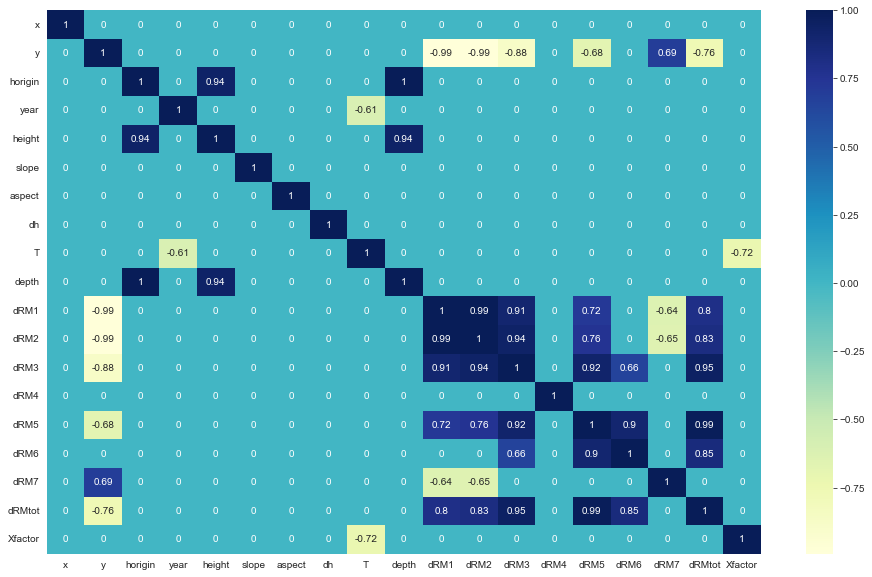

In [91]:
plt.figure(figsize=(16,10))
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu')
plt.show()

---

# **Random Forest**

In [140]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [141]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [142]:
from sklearn.ensemble import RandomForestRegressor

---

## Future prediction

In [113]:
dfTrain = sklearn.utils.resample(df[df.year < 2017], n_samples=50000, random_state=None, stratify=None)
Xo = dfTrain[col_study]
yo = dfTrain[param_study]
dfTest = sklearn.utils.resample(df[df.year > 2017], n_samples=50000, random_state=None, stratify=None)

Xt = dfTest[col_study]
yt = dfTest[param_study]
X_traino, X_testo, y_traino, y_testo = train_test_split(Xo, yo, test_size=0.3, random_state=42)

### Forest training

In [114]:
forest2 = RandomForestRegressor()
forest2.fit(X_traino, y_traino)

y_train_pred = forest2.predict(X_traino)
y_test_pred = forest2.predict(X_testo)
y_pred = forest2.predict(Xt)

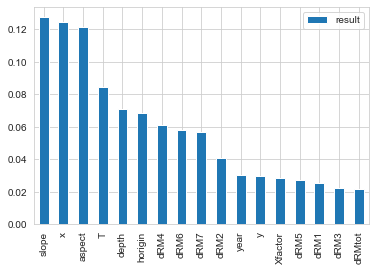

In [115]:
result = pd.DataFrame(forest2.feature_importances_,  df[col_study].columns)
result.columns = ['result']
result.sort_values(by='result', ascending=False).plot(kind='bar');

In [143]:
mean_absolute_error(y_pred, yt)

4.105843061719375

In [117]:
r2_score(yt, y_pred)

-0.5511485233352356

In [118]:
print(y_train_pred.shape," ",y_traino.shape," ",y_test_pred.shape," ",y_testo.shape)

(35000,)   (35000,)   (15000,)   (15000,)


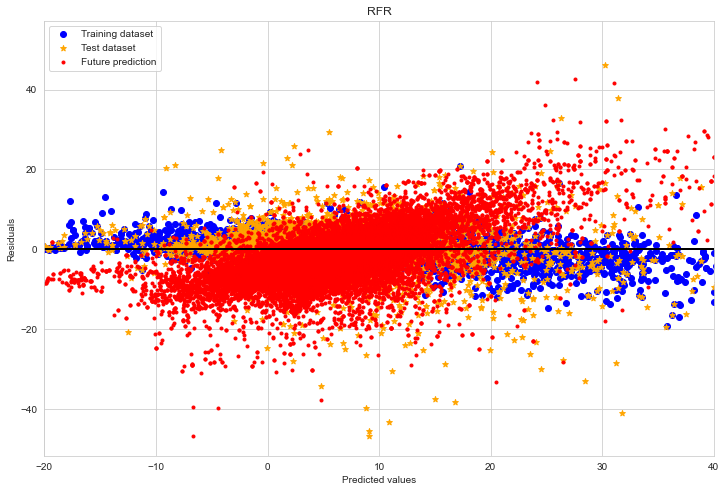

In [119]:
plt.figure(figsize=(12,8))
plt.title('RFR')
plt.scatter(y_train_pred, y_train_pred - y_traino, c='blue', marker='o', label='Training dataset')
plt.scatter(y_test_pred, y_test_pred - y_testo, c='orange', marker='*', label='Test dataset')
plt.scatter(y_pred, y_pred - yt, c='red', marker='.', label='Future prediction')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-50, xmax=100, lw=2, color='k')
plt.xlim([-20, 40])
plt.show()

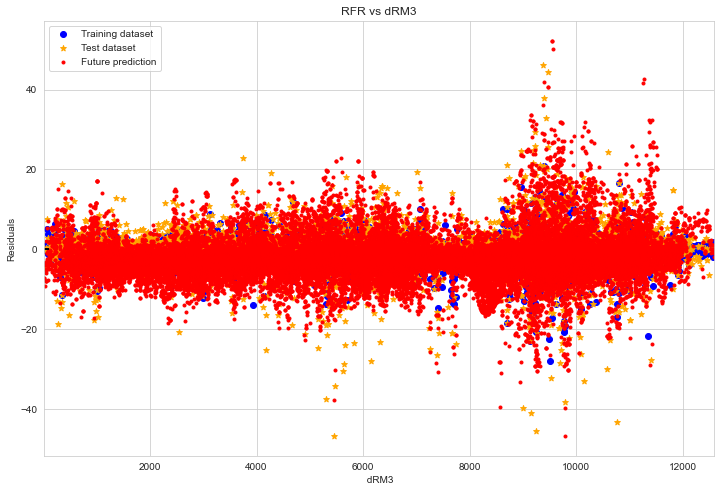

In [120]:
#forest2 = RandomForestRegressor()
#forest2.fit(X_traino, y_traino)

#y_train_pred = forest2.predict(X_traino)
#y_test_pred = forest2.predict(X_testo)
#y_pred = forest2.predict(Xt)

plt.figure(figsize=(12,8))
plt.title('RFR vs dRM3')
plt.scatter(X_traino['dRM3'], y_train_pred - y_traino, c='blue', marker='o', label='Training dataset')
plt.scatter(X_testo['dRM3'], y_test_pred - y_testo, c='orange', marker='*', label='Test dataset')
plt.scatter(Xt['dRM3'], y_pred - yt, c='red', marker='.', label='Future prediction')
plt.xlabel(' dRM3')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-50, xmax=100, lw=2, color='k')
plt.xlim([Xt['dRM3'].values.min(), Xt['dRM3'].values.max()])
plt.show()

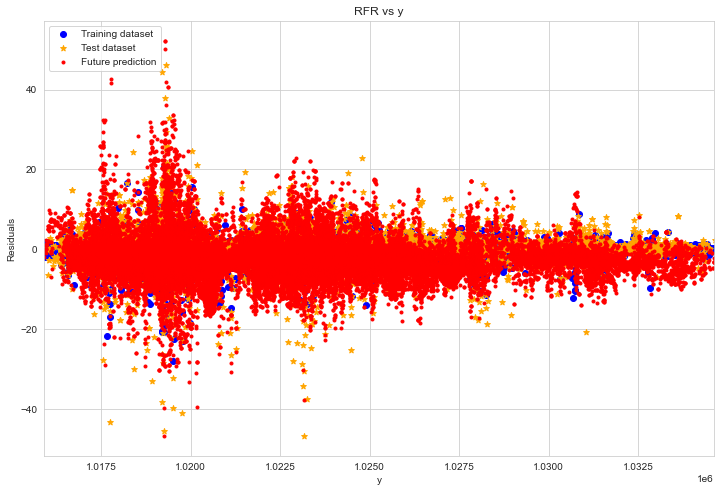

In [121]:
plt.figure(figsize=(12,8))
plt.title('RFR vs y')
plt.scatter(X_traino['y'], y_train_pred - y_traino, c='blue', marker='o', label='Training dataset')
plt.scatter(X_testo['y'], y_test_pred - y_testo, c='orange', marker='*', label='Test dataset')
plt.scatter(Xt['y'], y_pred - yt, c='red', marker='.', label='Future prediction')
plt.xlabel('y')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-50, xmax=100, lw=2, color='k')
plt.xlim([X_traino['y'].values.min(), X_traino['y'].values.max()])
plt.show()

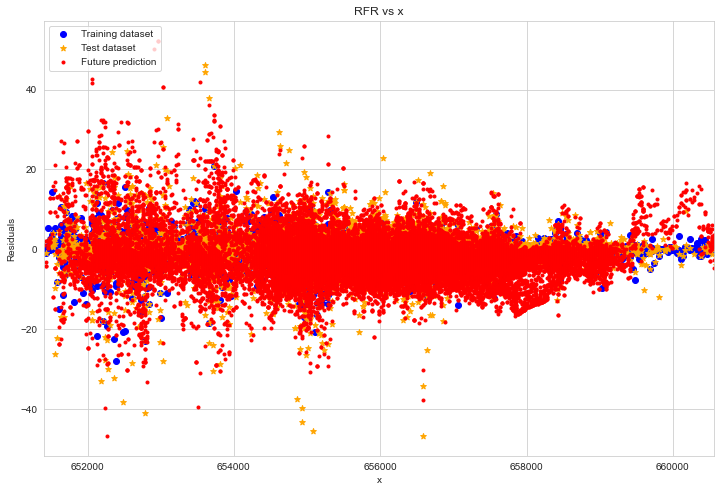

In [122]:
plt.figure(figsize=(12,8))
plt.title('RFR vs x')
plt.scatter(X_traino['x'], y_train_pred - y_traino, c='blue', marker='o', label='Training dataset')
plt.scatter(X_testo['x'], y_test_pred - y_testo, c='orange', marker='*', label='Test dataset')
plt.scatter(Xt['x'], y_pred - yt, c='red', marker='.', label='Future prediction')
plt.xlabel('x')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-50, xmax=100, lw=2, color='k')
plt.xlim([X_traino['x'].values.min(), X_traino['x'].values.max()])
plt.show()

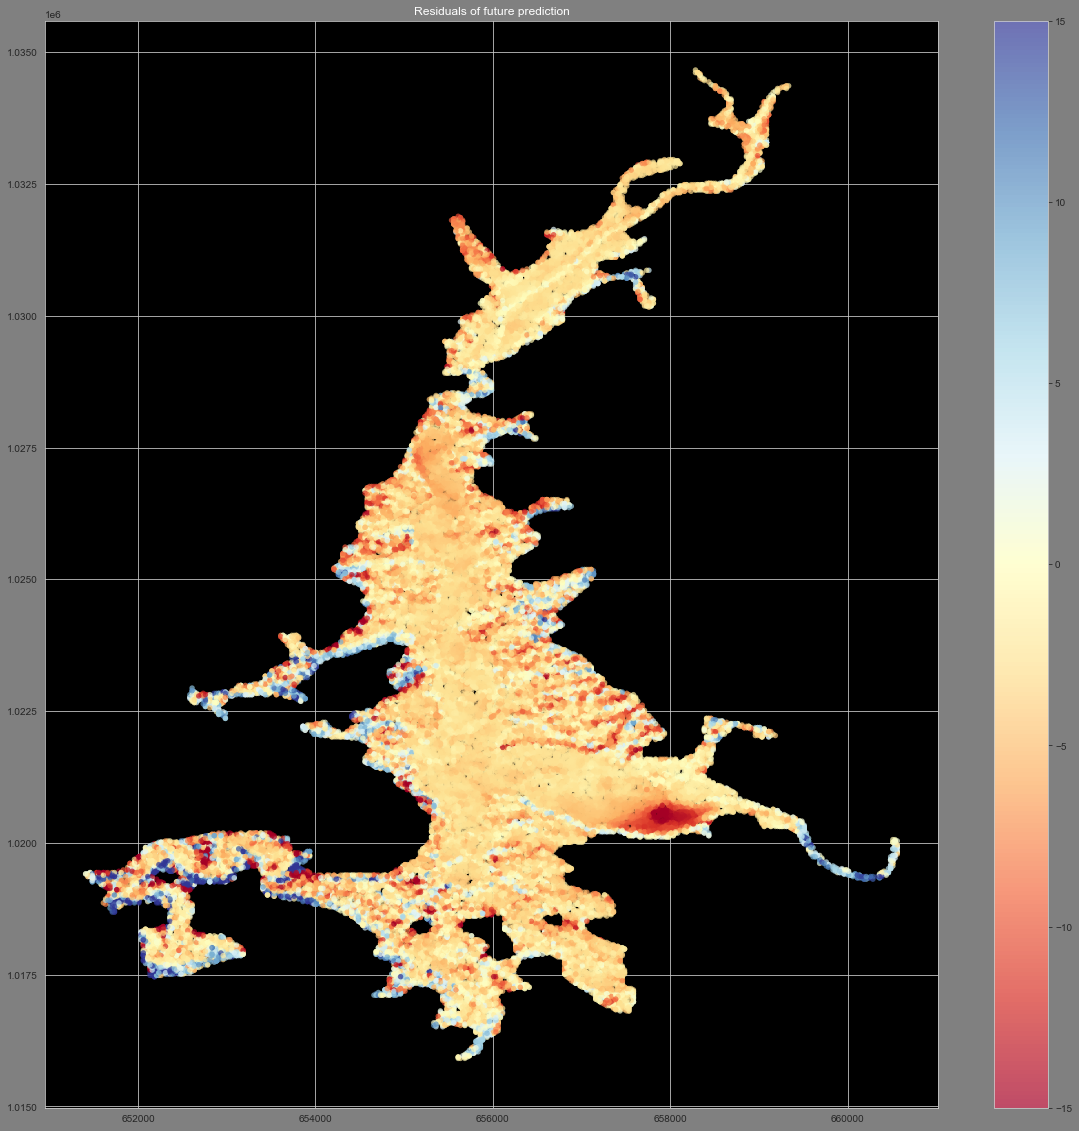

In [123]:
fig = plt.figure(figsize=(20, 20), facecolor='grey')
ax = plt.axes()
ax.set_facecolor("black")
cm = plt.cm.get_cmap('RdYlBu')
sc = plt.scatter(Xt['x'], Xt['y'],
           linewidths=1, alpha=.7,
            edgecolor='none',
           s = 30,
           c=( y_pred - yt),
            cmap=cm)
plt.clim(-15, 15)
plt.colorbar(sc)
plt.title('Residuals of future prediction', color='white')
plt.show()

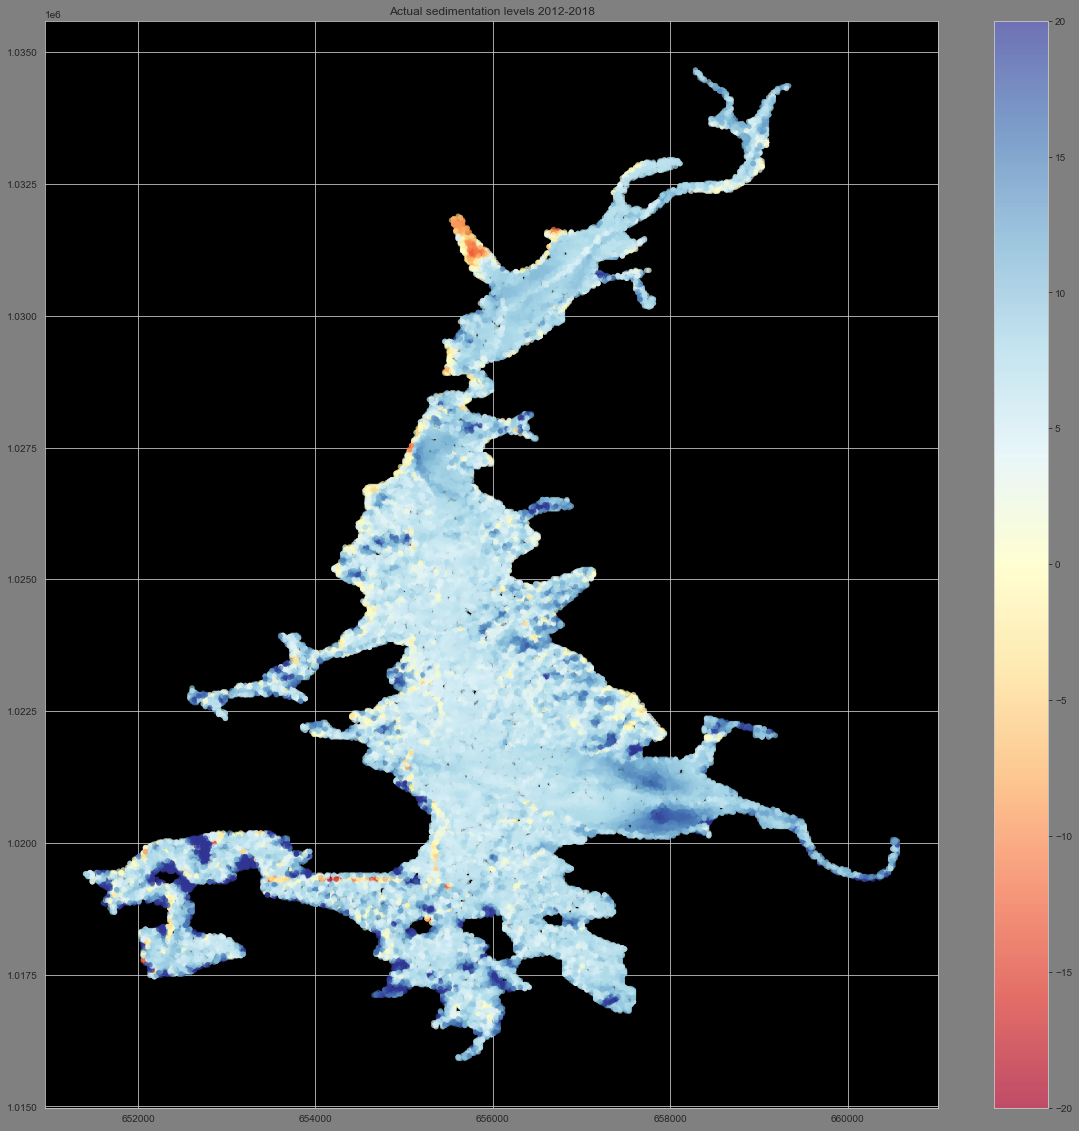

In [124]:
fig = plt.figure(figsize=(20, 20), facecolor='grey')
ax = plt.axes()
ax.set_facecolor("black")
cm = plt.cm.get_cmap('RdYlBu')
sc = plt.scatter(Xt['x'], Xt['y'],
           linewidths=1, alpha=.7,
            edgecolor='none',
           s = 30,
           c=(yt),
            cmap=cm)
plt.clim(-20, 20)
plt.colorbar(sc)
plt.title('Actual sedimentation levels 2012-2018')
plt.show()

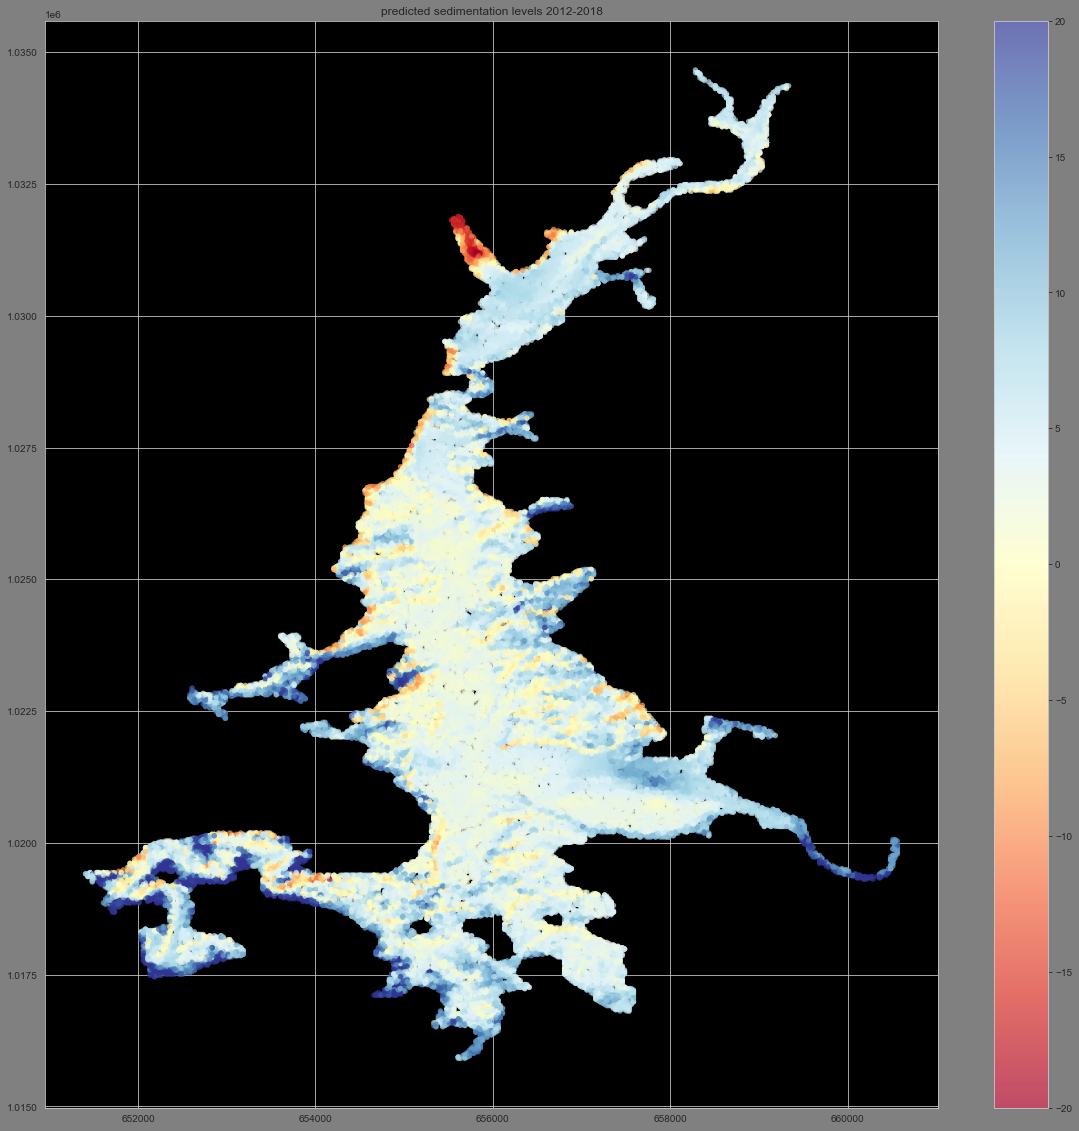

In [125]:
fig = plt.figure(figsize=(20, 20),facecolor='grey')
ax = plt.axes()
ax.set_facecolor("black")
cm = plt.cm.get_cmap('RdYlBu')
sc = plt.scatter(Xt['x'], Xt['y'],
           linewidths=1, alpha=.7,
            edgecolor='none',
           s = 30,
           c=(y_pred),
            cmap=cm)
plt.clim(-20, 20)
plt.colorbar(sc)
plt.title('predicted sedimentation levels 2012-2018')
plt.show()

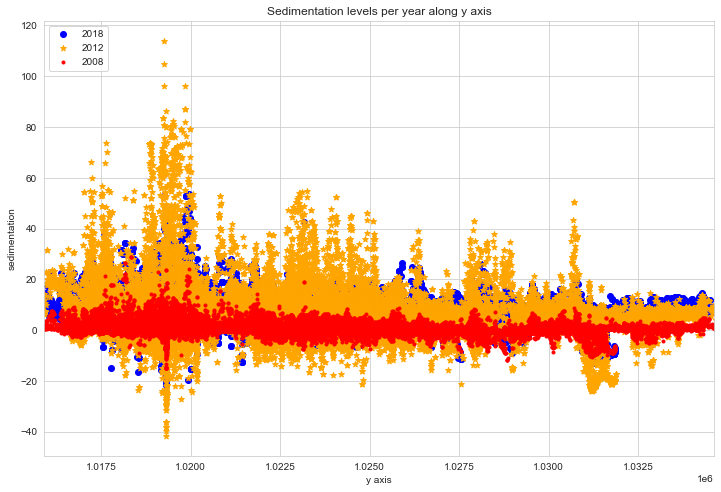

In [129]:
df18 = sklearn.utils.resample(df[df.year == 2018], n_samples=50000, random_state=None, stratify=None)
df12 = sklearn.utils.resample(df[df.year == 2012], n_samples=50000, random_state=None, stratify=None)
df08 = sklearn.utils.resample(df[df.year == 2008], n_samples=50000, random_state=None, stratify=None)
#df97 = sklearn.utils.resample(df[df.year == 1997], n_samples=10000, random_state=None, stratify=None)

plt.figure(figsize=(12,8))
plt.title('Sedimentation levels per year along y axis')
plt.scatter(df18['y'], df18['dh'], c='blue', marker='o', label='2018')
plt.scatter(df12['y'], df12['dh'], c='orange', marker='*', label='2012')
plt.scatter(df08['y'], df08['dh'], c='red', marker='.', label='2008')
#plt.scatter(df97['y'], df97['dh'], c='yellow', marker='.', label='1997')
#plt.scatter(Xt['y'], y_pred, c='green', marker='*', label='2018 pred')
plt.xlabel('y axis')
plt.ylabel('sedimentation')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-50, xmax=100, lw=2, color='k')
plt.xlim([X_traino['y'].values.min(), X_traino['y'].values.max()])
plt.show()

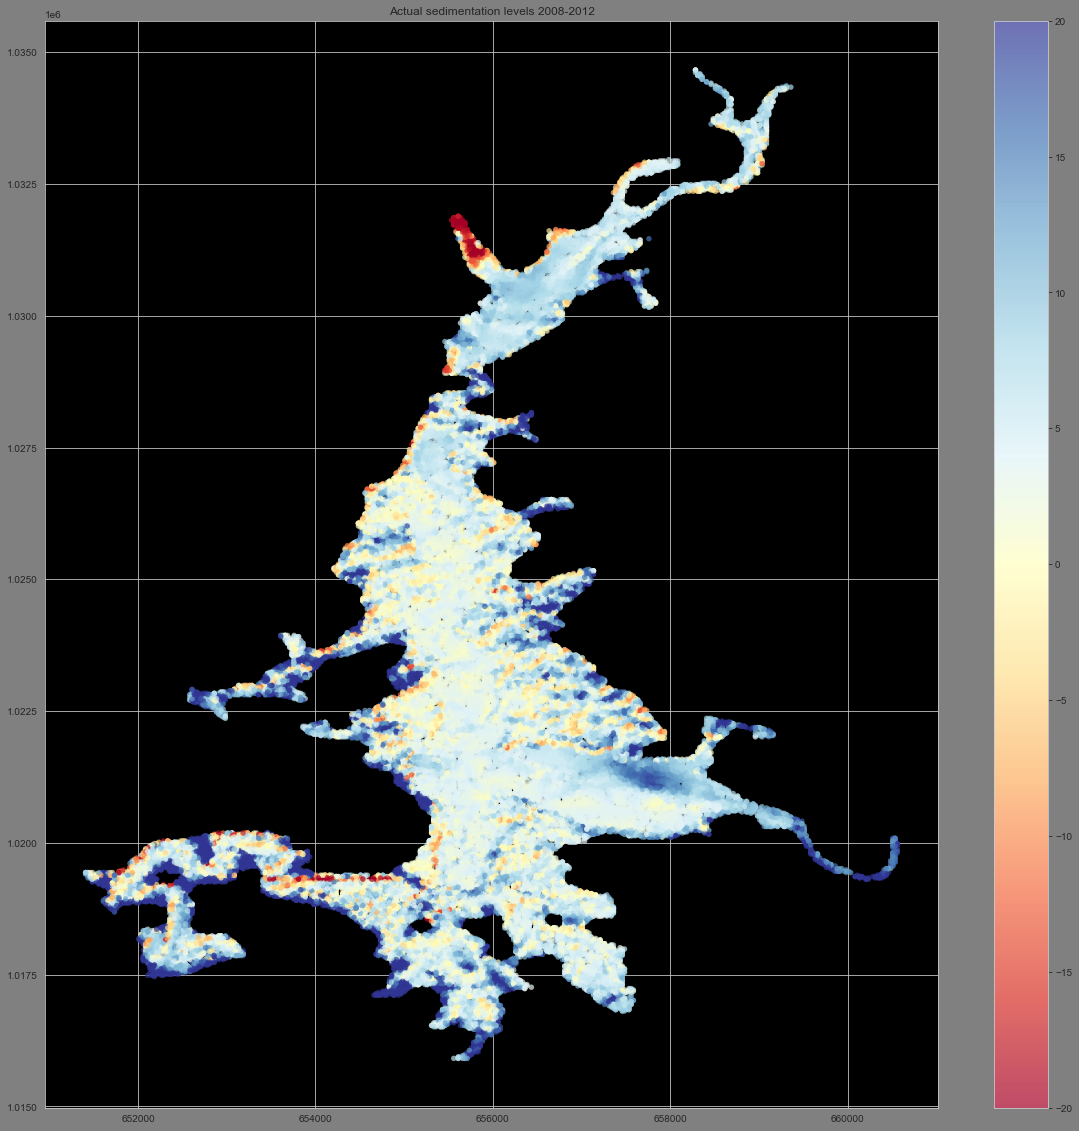

In [130]:
fig = plt.figure(figsize=(20, 20), facecolor='grey')
ax = plt.axes()
ax.set_facecolor("black")
cm = plt.cm.get_cmap('RdYlBu')
sc = plt.scatter(df12['x'], df12['y'],
           linewidths=1, alpha=.7,
            edgecolor='none',
           s = 30,
           c=(df12['dh']),
            cmap=cm)
plt.clim(-20, 20)
plt.colorbar(sc)
plt.title('Actual sedimentation levels 2008-2012')
plt.show()

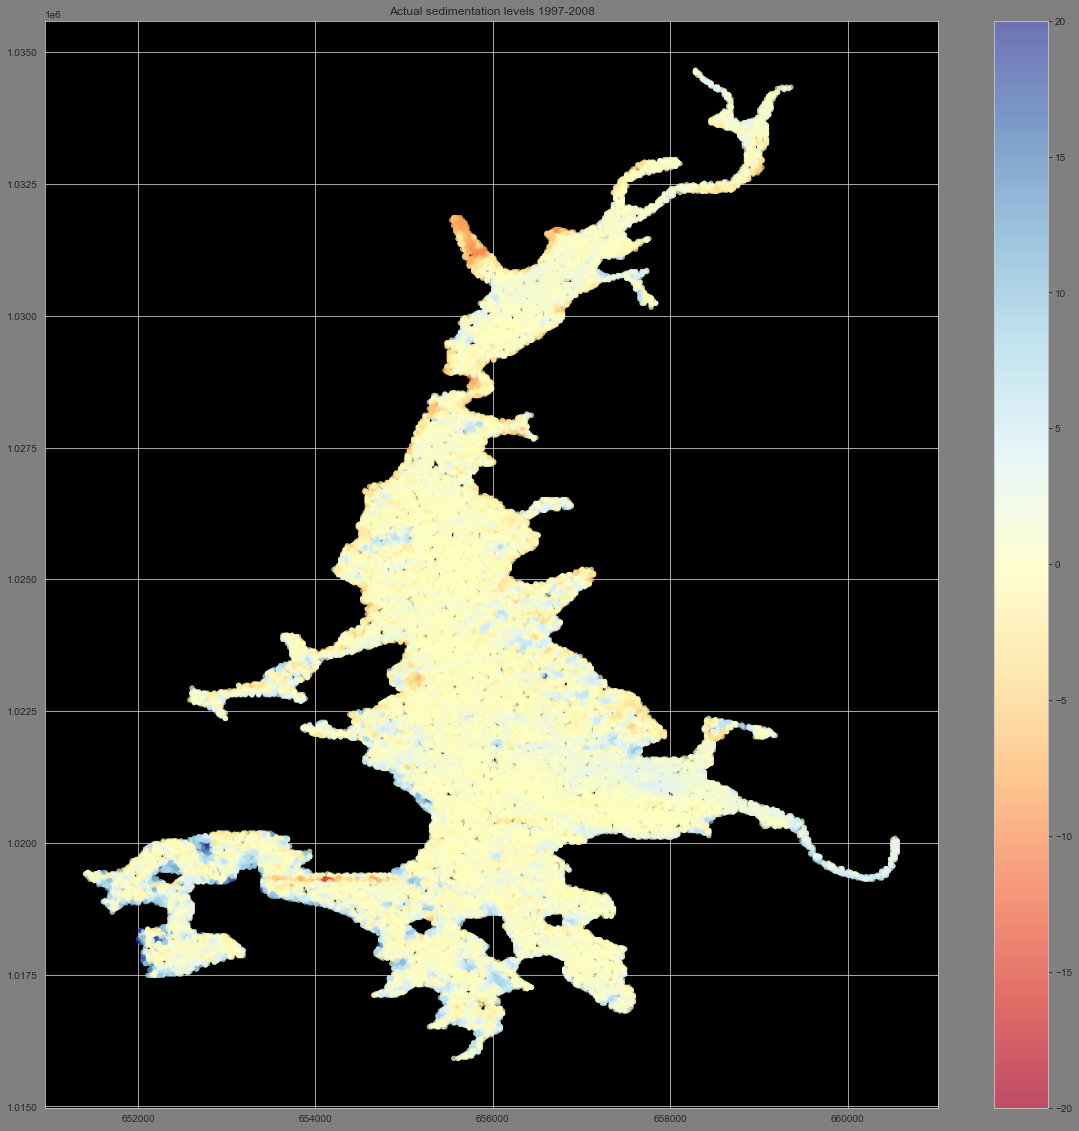

In [131]:
fig = plt.figure(figsize=(20, 20), facecolor='grey')
ax = plt.axes()
ax.set_facecolor("black")
cm = plt.cm.get_cmap('RdYlBu')
sc = plt.scatter(df08['x'], df08['y'],
           linewidths=1, alpha=.7,
            edgecolor='none',
           s = 30,
           c=(df08['dh']),
            cmap=cm)
plt.clim(-20, 20)
plt.colorbar(sc)
plt.title('Actual sedimentation levels 1997-2008')
plt.show()

C:\Users\neder\Anaconda3\envs\geemap\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


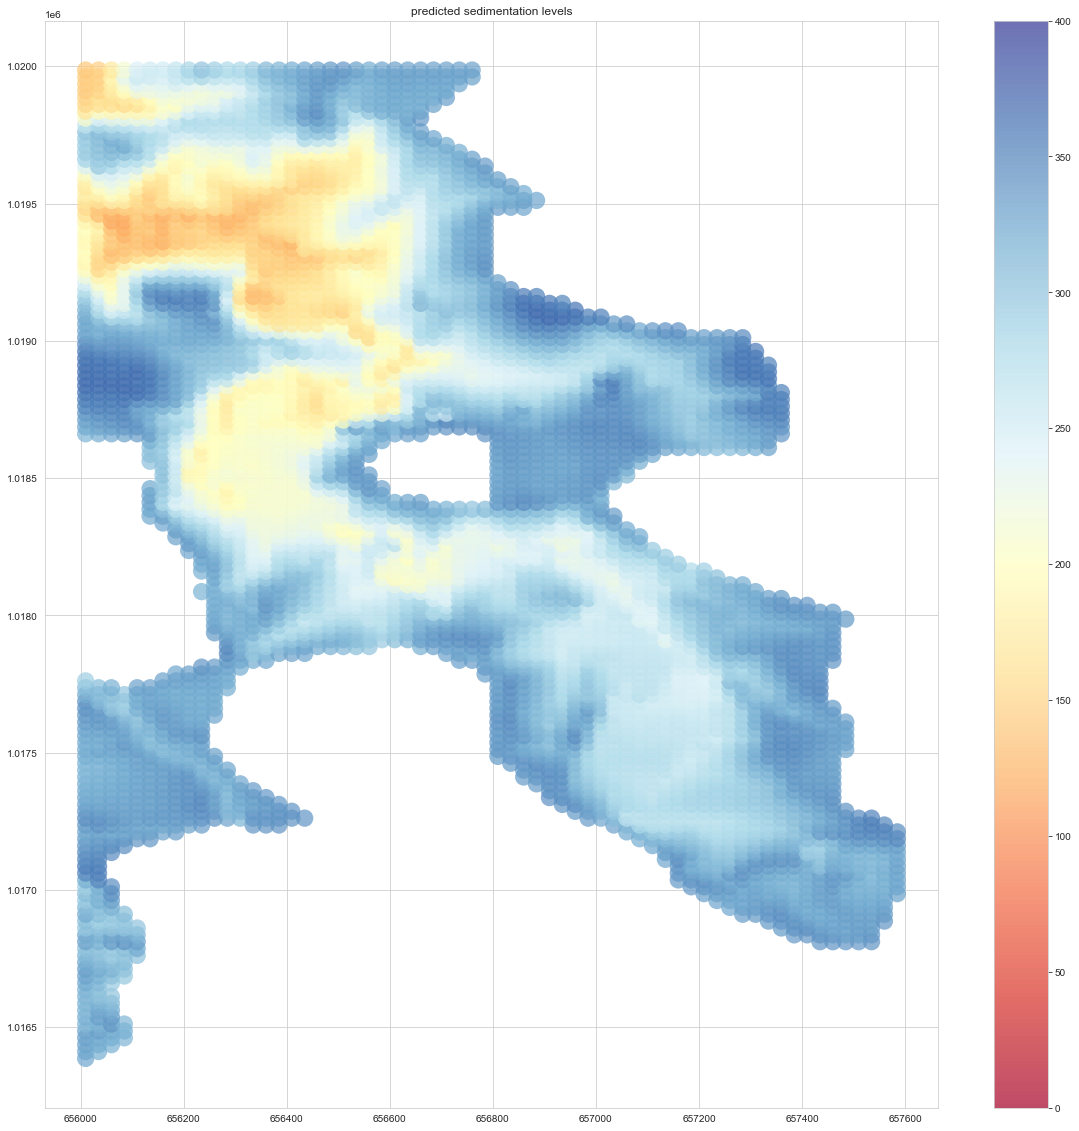

In [132]:
dftrial = df[656000 < df.x][df.x < 658000][df.year == 2018][1020000 > df.y]
fig = plt.figure(figsize=(20, 20))
cm = plt.cm.get_cmap('RdYlBu')
sc = plt.scatter(dftrial['x'], dftrial['y'],
           linewidths=1, alpha=.7,
            edgecolor='none',
           s = 300,
           c=(dftrial['depth']-dftrial['dh']+5),
            cmap=cm)
plt.clim(0, 400)
plt.colorbar(sc)
plt.title('predicted sedimentation levels')
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x24c838fbb88>,
 'caps': [<matplotlib.lines.Line2D at 0x24c802c9188>,
 'boxes': [<matplotlib.lines.Line2D at 0x24c838d8fc8>,
 'medians': [<matplotlib.lines.Line2D at 0x24c802c90c8>,
 'fliers': [],
 'means': []}

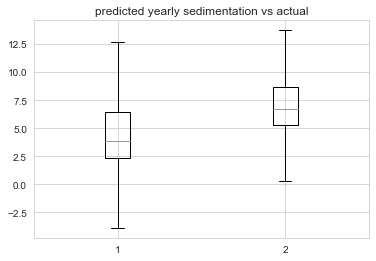

In [133]:
fig4, ax4 = plt.subplots()
ax4.set_title('predicted yearly sedimentation vs actual')
ax4.boxplot([y_pred, yt], showfliers=False)

{'whiskers': [<matplotlib.lines.Line2D at 0x24c806aa788>,
 'caps': [<matplotlib.lines.Line2D at 0x24c802b8a88>,
 'boxes': [<matplotlib.lines.Line2D at 0x24c802a9408>,
 'medians': [<matplotlib.lines.Line2D at 0x24c838ef808>,
 'fliers': [],
 'means': []}

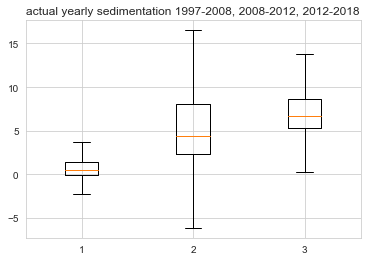

In [134]:
fig4, ax4 = plt.subplots()
ax4.set_title('actual yearly sedimentation 1997-2008, 2008-2012, 2012-2018')
ax4.boxplot([df08['dh'],df12['dh'],df18['dh']], showfliers=False)

# Predicting 2022

In [135]:
dffuture = pd.read_csv('data/FutureInput.csv', delim_whitespace=False, header=0)

In [136]:
dffuture.keys()

Index(['x', 'y', 'horigin', 'year', 'height', 'slope', 'aspect', 'T', 'dRM1',
       'dRM2', 'dRM3', 'dRM4', 'dRM5', 'dRM6', 'dRM7', 'dRMtot', 'depth',
       'Xfactor'],
      dtype='object')

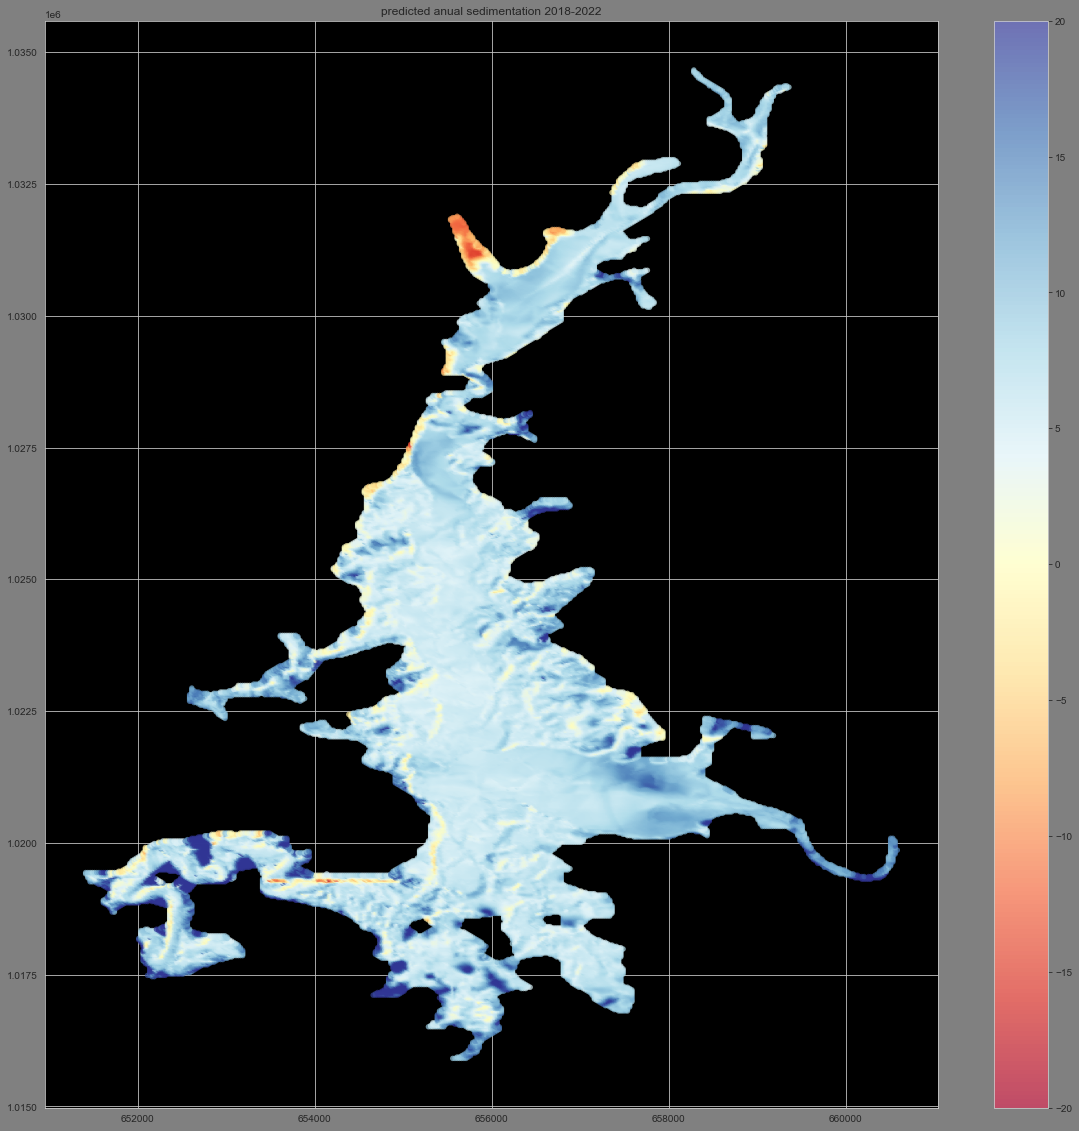

In [146]:
forest3 = RandomForestRegressor()
forest3.fit(df[col_study], df[param_study])
future_pred = forest3.predict(dffuture[col_study])
fig = plt.figure(figsize=(20, 20), facecolor='grey')
ax = plt.axes()
ax.set_facecolor("black")
cm = plt.cm.get_cmap('RdYlBu')
sc = plt.scatter(dffuture['x'], dffuture['y'],
           linewidths=1, alpha=.7,
            edgecolor='none',
           s = 30,
           c=(future_pred),
            cmap=cm)
plt.clim(-20, 20)
plt.colorbar(sc)
plt.title('predicted anual sedimentation 2018-2022')
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x24ca215eb88>,
 'caps': [<matplotlib.lines.Line2D at 0x24ca215e808>,
 'boxes': [<matplotlib.lines.Line2D at 0x24ca215e648>,
 'medians': [<matplotlib.lines.Line2D at 0x24ca215e9c8>,
 'fliers': [],
 'means': []}

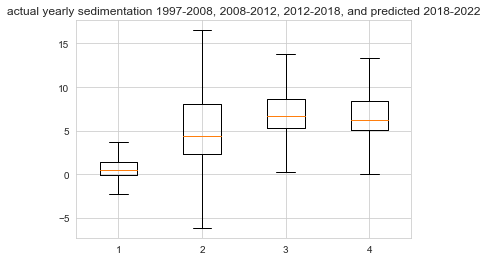

In [147]:
fig4, ax4 = plt.subplots()
ax4.set_title('actual yearly sedimentation 1997-2008, 2008-2012, 2012-2018, and predicted 2018-2022')
ax4.boxplot([df08['dh'],df12['dh'],df18['dh'],future_pred], showfliers=False)